# **FUNCTIONS**

## **Built‑in Functions (already used)**


1.   print(), len(), int(), range(), etc.
2.   Identified by name + **parentheses.**



## **Defining Your Own Function – 2‑Step Process**
**Step 1 – Define (create the recipe)**


```
def function_name():
    # indented block of code
    # instructions to run when called
```

- Keyword: def

- Name: follow variable naming rules

- Parentheses () – distinguishes function from variable

- Colon : – marks start of function body

- Indented block – all lines that belong to the function

**Step 2 – Call (use the recipe)**



```
function_name()
```

- Execution jumps to the function definition, runs its code, then returns.


**Benefits – Why Functions Matter**
- **Reusability** – write once, use many times

- **Readability** – meaningful name explains purpose (e.g., turn_right vs turn_left() ×3)

- **Reduces code duplication** – saves typing, easier maintenance

# **WHILE LOOPS**


```
while condition:
    # indented block
    # executed repeatedly as long as condition is True
```
1. **Evaluate condition.**

2. **If True** → run indented block → go back to step 1.

3. **If False** → exit loop.


## **For Loop vs While Loop – When to Use Which**
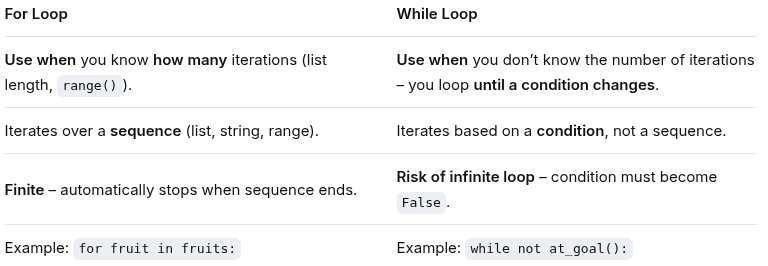

## **Infinite Loops – Cause & Cure**
Cause: Condition never becomes False.

- Example: while 5 > 3: – always True.

- Prevention:

  - Ensure something inside the loop changes the condition.

  - Print the condition to debug.

  - Use a counter (like number_of_hurdles -= 1).

## [**REEBORG’S WORLD – PROGRESSIVE CHALLENGES** ](https://reeborg.ca/reeborg.html?lang=en&mode=python&menu=worlds%2Fmenus%2Freeborg_intro_en.json&name=Alone&url=worlds%2Ftutorial_en%2Falone.json)


All challenges require Reeborg’s functions:

- move() – advance one step in facing direction.

- turn_left() – rotate left 90°.

- at_goal() – True if robot on the flag.

- wall_in_front(), front_is_clear(), wall_on_right(), right_is_clear() – condition tests.

## **[Hurdle 1](https://reeborg.ca/reeborg.html?lang=en&mode=python&menu=worlds%2Fmenus%2Freeborg_intro_en.json&name=Hurdle%201&url=worlds%2Ftutorial_en%2Fhurdle1.json) – Fixed 6 Hurdles, Known Steps**
Goal: Jump over 6 hurdles of fixed height (1 step high).

Solution Pattern:

1. Define turn_right().

2. Define jump() – sequence for one hurdle.

3. Use for loop with range(6) to call jump() six times.



```
def turn_right():
    turn_left()
    turn_left()
    turn_left()

def jump():
    move()
    turn_left()
    move()
    turn_right()
    move()
    turn_right()
    move()
    turn_left()

for step in range(6):
    jump()
```



##**[Hurdle 2](https://reeborg.ca/reeborg.html?lang=en&mode=python&menu=worlds%2Fmenus%2Freeborg_intro_en.json&name=Hurdle%202&url=worlds%2Ftutorial_en%2Fhurdle2.json) – Random Goal Position**
**New challenge:** Flag is placed randomly; number of hurdles unknown.

**Solution:** Use while loop with at_goal() condition.



```
while not at_goal():
    jump()
```
**Why while?** Because we don’t know in advance how many jumps are needed.

**Syntax note:** while not at_goal() is equivalent to while at_goal() != True.




## **[Hurdle 3](https://reeborg.ca/reeborg.html?lang=en&mode=python&menu=worlds%2Fmenus%2Freeborg_intro_en.json&name=Hurdle%203&url=worlds%2Ftutorial_en%2Fhurdle3.json) – Random Wall Positions**
**New challenge:** Walls appear randomly; robot may need to move forward when no wall.

**Solution**:

**Modify jump()** – remove the initial move() (it would hit the wall).

**In main loop:** if wall in front → jump; else → move.



```
def jump():
    turn_left()
    move()
    turn_right()
    move()
    turn_right()
    move()
    turn_left()

while not at_goal():
    if wall_in_front():
        jump()
    else:
        move()
```

**Important:** The jump function now assumes the robot is immediately in front of the wall. It does not move forward first.


## **[Hurdle 4](https://reeborg.ca/reeborg.html?lang=en&mode=python&menu=worlds%2Fmenus%2Freeborg_intro_en.json&name=Hurdle%204&url=worlds%2Ftutorial_en%2Fhurdle4.json) – Variable Height Hurdles**
**New challenge:** Hurdle height is random each time.

**Solution:**

- Use while loops inside jump() to climb as high as needed.

- Climb while wall on right → keep moving up.

- Descend while front is clear → keep moving down.



```
def jump():
    turn_left()
    while wall_on_right():   # climb until no wall on right
        move()
    turn_right()
    move()
    turn_right()
    while front_is_clear():  # go down until ground
        move()
    turn_left()
```



## **Advanced Debugging – Solving the Edge Case**

**Symptom:** Robot circles endlessly; step count exceeds 1000.

**Cause:** No wall on right → the condition right_is_clear() is always True → robot keeps turning right and moving, never escaping.

**Solution:**
Add a pre‑loop that moves the robot until it has a wall in front, then turns left – placing that wall on its right side.



```
# --- Pre‑loop: get a wall on the right ---
while front_is_clear():
    move()
turn_left()

# --- Main right‑edge following loop ---
while not at_goal():
    if right_is_clear():
        turn_right()
        move()
    elif front_is_clear():
        move()
    else:
        turn_left()
```

